# Rede Neural - Titanic Data Set

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from time import time
import matplotlib as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
testDataSet = pd.read_csv('titanic\\test.csv')
trainDataSet = pd.read_csv('titanic\\train.csv')

## Visualize data sets

In [4]:
testDataSet.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
trainDataSet.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Getting more information about data

#### Checking for null values

In [6]:
trainDataSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that some of columns has missing values. Since we don't have a huge data set, we cannot affort to discard that amount of data, so we are gone dig in those fields where we have missing values.

In [7]:
trainDataSet['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

[Text(0, 0.5, 'count'), Text(0.5, 0, 'ages')]

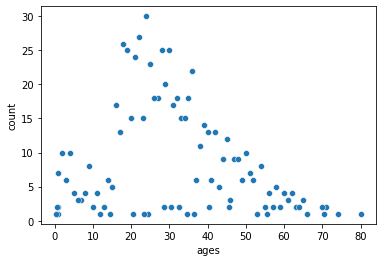

In [8]:
ax = sns.scatterplot(x=trainDataSet['Age'].value_counts().index, y=trainDataSet['Age'].value_counts())
ax.set(ylabel='count', xlabel='ages')

Visualizing the plot and the numbers of value_counts, we can see that we don't have any outlier that will probably mess up our values. But if we consider only the mean value, since we have 177 missing data (which represents almost 20% of our data set), we'll turn the mean value in a outlier. So, the approach we are gona follow is to generate random numbers for each missing value based on the values that we have.

In [9]:
trainDataSet["Age"] = trainDataSet["Age"].apply(lambda x: np.random.choice(trainDataSet["Age"].dropna().values) if np.isnan(x) else x)
testDataSet["Age"] = testDataSet["Age"].apply(lambda x: np.random.choice(testDataSet["Age"].dropna().values) if np.isnan(x) else x)

In [10]:
trainDataSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

[Text(0, 0.5, 'count'), Text(0.5, 0, 'ages')]

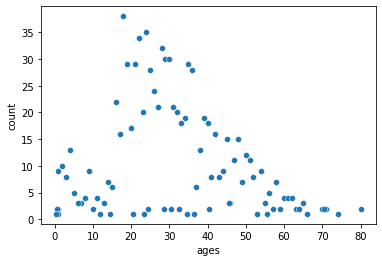

In [11]:
ax = sns.scatterplot(x=trainDataSet['Age'].value_counts().index, y=trainDataSet['Age'].value_counts())
ax.set(ylabel='count', xlabel='ages')

In [12]:
trainDataSet['Age'].value_counts()

18.00    38
24.00    35
22.00    34
28.00    32
29.00    30
         ..
36.50     1
12.00     1
14.50     1
0.92      1
0.42      1
Name: Age, Length: 88, dtype: int64

Now we have all Age column filled and we were able to maintain the distribuition of the data.

The Cabin column represents the number of each cabin on the ship. Since we have almost 80% of data missing, i don't think, as a first approach, that generate 80% of data in a column will bring better results.

In [13]:
trainDataSet.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
testDataSet.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

As for the Embarked column, that represents the port where passangers get in, since we only have 2 missing data, we can fill them with the most commun port.

In [14]:
trainDataSet["Embarked"].fillna(trainDataSet["Embarked"].value_counts().index.max(), inplace=True)
testDataSet["Embarked"].fillna(testDataSet["Embarked"].value_counts().index.max(), inplace=True)

In [15]:
trainDataSet["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
trainDataSet.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Replacing string values

#### Sex

In [17]:
trainDataSet.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
testDataSet.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

In [18]:
trainDataSet.replace({'Embarked': {'S': 0, 'C': 1, 'Q':2}}, inplace=True)
testDataSet.replace({'Embarked': {'S': 0, 'C': 1, 'Q':2}}, inplace=True)

In [19]:
scaler = StandardScaler()
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X_train = scaler.fit_transform(trainDataSet[features].values) #variables that we use to predict
y_train = trainDataSet['Survived'].values


In [20]:
y_train_onehot = pd.get_dummies(trainDataSet['Survived']).values

### Validação

In [21]:
X_test = scaler.fit_transform(testDataSet[features].values) #variables that we use to predict
#y_test = trainDataSet[600:]['Survived'].values

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [23]:
model = Sequential()
model.add(Dense(input_dim=7, units=1000))

model.add(Dense(units=500))

model.add(Dense(units=300))

model.add(Dense(units=2))

model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot)

28/28 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7755


In [24]:
y_prediction = model.predict_classes(X_test)
#print("\nAcuracia: ", np.sum(y_prediction == y_test) / float(len(y_test)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
len(y_prediction)

418

In [27]:
submission = pd.read_csv('titanic\\gender_submission.csv')


In [28]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
preds = y_prediction.astype(np.int16)
submission['Survived'] = preds

In [37]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [38]:
submission.to_csv('submission.csv', index=False)